# SoftMax and CrossEntropy

## SoftMax in Numpy

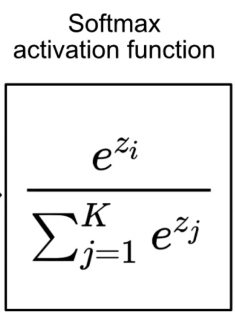

Here, zi represents the input to the softmax function for class i, and the denominator is the sum of the exponentials of all the raw class scores in the output layer.

In [92]:
# import modules
import numpy as np
import torch

In [101]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [102]:
y1 = np.array([3,5.1,2,0.5,0.1])


y2 = np.array([[3,5.1,2,0.5,0.1],
               [9,0.1,0.2,1,2]])

In [103]:
softmax(y1)

array([0.10340024, 0.84438392, 0.03803882, 0.00848761, 0.00568941])

In [106]:
softmax(y1).sum()

1.0

In [107]:
softmax(y2)

array([[0.00247262, 0.99330715, 0.85814894, 0.37754067, 0.13010847],
       [0.99752738, 0.00669285, 0.14185106, 0.62245933, 0.86989153]])

In [109]:
softmax(y2).sum()

5.0

## SoftMax in Torch

In [112]:
y1 = torch.from_numpy(y1.astype(np.float32))
y2 = torch.from_numpy(y2.astype(np.float32))

In [114]:
torch.softmax(y1, dim=0)

tensor([0.1034, 0.8444, 0.0380, 0.0085, 0.0057])

In [115]:
torch.softmax(y2, dim=0)

tensor([[0.0025, 0.9933, 0.8581, 0.3775, 0.1301],
        [0.9975, 0.0067, 0.1419, 0.6225, 0.8699]])

## Cross Entropy in Numpy

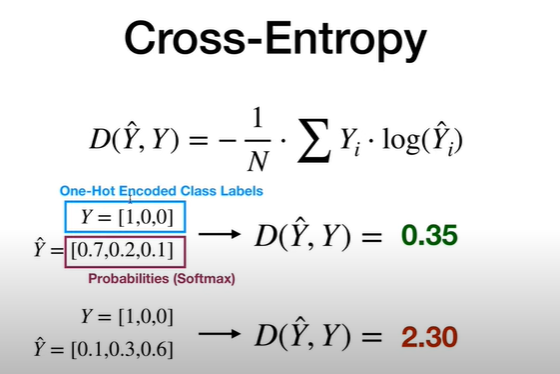

In [218]:
def cross_entropy_loss(predicted, actual):
    ns = actual.shape[0]
    loss = -np.sum(actual * np.log(predicted), axis=1)/ns
    return loss

In [219]:
# must be in One Hot Encoder
# if class 0 : [1,0,0]
# if class 1 : [0,1,0]
# if class 2 : [0,0,1]
Y = np.array([[1,0,0]])

# probabilites, converted with softmax
Yh_good = np.array([[0.7, 0.2, 0.1]])
Yh_bad  = np.array([[0.1,0.3,0.6]])

In [220]:
loss_good = cross_entropy_loss(Yh_good, Y)
loss_bad  = cross_entropy_loss(Yh_bad, Y)

In [221]:
print(f'loss good : {loss_good.item() :.4f}')
print(f'loss bad  : {loss_bad.item()  :.4f}')

loss good : 0.3567
loss bad  : 2.3026


## Cross Entropy in Torch

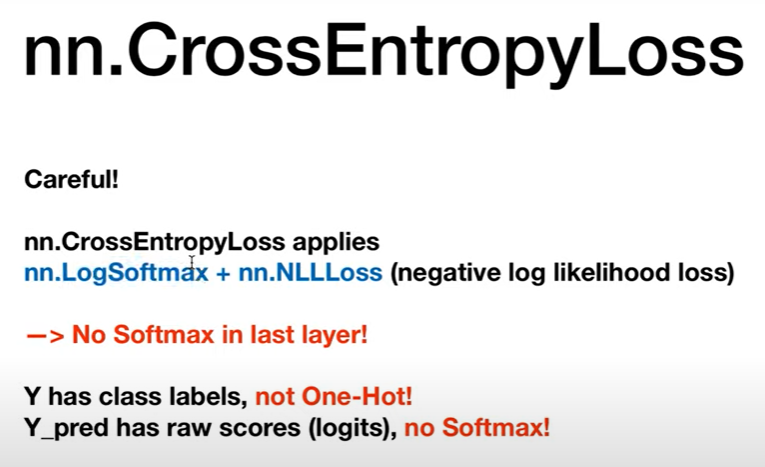

In [222]:
# must be NOT in One Hot Encoder
Y = torch.tensor([0])

# input must be in Logit, NOT probabilities
Yh_good = torch.tensor([[7, 0.2, 0.1]]).float()
Yh_bad  = torch.tensor([[1,3,6]]).float()

In [223]:
import torch.nn as nn

In [224]:
loss = nn.CrossEntropyLoss()

loss_good = loss(Yh_good, Y)
loss_bad = loss(Yh_bad, Y)

In [225]:
print(f'loss good : {loss_good.item() :.4f}')
print(f'loss bad  : {loss_bad.item()  :.4f}')

loss good : 0.0021
loss bad  : 5.0550
